# TELECOM X - PARTE 2: PREDICCIÓN DE CANCELACIÓN (Churn)

## Extracción Source Data



In [28]:
import pandas as pd

url = "https://raw.githubusercontent.com/JosefRivers-Dev/Data-Science_Telecom_2_Oracle-LATAM/refs/heads/main/datos_tratados.csv"

**Fuente de Datos:**
- Los datos ya tratados provienen del siguiente URL: https://raw.githubusercontent.com/JosefRivers-Dev/Data-Science_Telecom_2_Oracle-LATAM/refs/heads/main/datos_tratados.csv

**Resumen del Proceso de Transformación de Datos:**
- **Normalización de Columnas:** Se renombraron las columnas para una mejor comprensión y se extrajeron los nombres finales después del último punto.
- **Cambio de Nombre a Español:** Se mapearon los nombres de las columnas a español para facilitar el análisis local.
- **Estandarización de Tipos de Datos:**
  - La columna 'Consumo_Total' se convirtió a tipo numérico, manejando posibles errores.
  - La columna 'Edad_Avanzada' se convirtió a tipo 'object'.
- **Limpieza y Estandarización de Valores:**
  - Se reemplazaron valores vacíos en 'Cancelacion_Servicio' por 'No'.
  - Se mapearon los valores numéricos (0, 1) en 'Edad_Avanzada' a ('No', 'Yes').
  - Se estandarizaron los valores 'No phone service' y 'No internet service' a 'No' en las columnas de servicios.

In [29]:
datos = pd.read_csv(url)
datos.head()

,ID_Cliente,Cancelacion_Servicio,Género,Edad_Avanzada,Tiene_Pareja,Tiene_Dependientes,Antigüedad_Meses,Servicio_Telefonico,Servicio_Líneas,Servicio_Internet,...,Servicio_Soporte,Servicio_TV,Servicio_Streaming,Tipo_Contrato,Factura_en_Linea,Metodo_Pago,Consumo_Mensual,Consumo_Total,Servicio_Status,Servicio_Inter
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,Activo,Yes
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,Activo,Yes
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Cancelado,Yes
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Cancelado,Yes
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Cancelado,Yes


In [30]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelacion_Servicio  7267 non-null   object 
 2   Género                7267 non-null   object 
 3   Edad_Avanzada         7267 non-null   object 
 4   Tiene_Pareja          7267 non-null   object 
 5   Tiene_Dependientes    7267 non-null   object 
 6   Antigüedad_Meses      7267 non-null   int64  
 7   Servicio_Telefonico   7267 non-null   object 
 8   Servicio_Líneas       7267 non-null   object 
 9   Servicio_Internet     7267 non-null   object 
 10  Servicio_Seguridad    7267 non-null   object 
 11  Servicio_Respaldo     7267 non-null   object 
 12  Servicio_Proteccion   7267 non-null   object 
 13  Servicio_Soporte      7267 non-null   object 
 14  Servicio_TV           7267 non-null   object 
 15  Servicio_Streaming   

## Eliminar columnas que no son relevantes para el modelo

In [31]:
datos = datos.drop(['ID_Cliente'], axis=1)
datos.head()

,Cancelacion_Servicio,Género,Edad_Avanzada,Tiene_Pareja,Tiene_Dependientes,Antigüedad_Meses,Servicio_Telefonico,Servicio_Líneas,Servicio_Internet,Servicio_Seguridad,...,Servicio_Soporte,Servicio_TV,Servicio_Streaming,Tipo_Contrato,Factura_en_Linea,Metodo_Pago,Consumo_Mensual,Consumo_Total,Servicio_Status,Servicio_Inter
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,Activo,Yes
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,Activo,Yes
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Cancelado,Yes
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Cancelado,Yes
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Cancelado,Yes


## Transformar todas las variables categóricas a one-hot encoding

In [32]:
datos = pd.get_dummies(datos, columns=datos.select_dtypes(include=['object']).columns, drop_first=True)
datos.head()

,Antigüedad_Meses,Consumo_Mensual,Consumo_Total,Cancelacion_Servicio_Yes,Género_Male,Edad_Avanzada_Yes,Tiene_Pareja_Yes,Tiene_Dependientes_Yes,Servicio_Telefonico_Yes,Servicio_Líneas_Yes,...,Servicio_TV_Yes,Servicio_Streaming_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Factura_en_Linea_Yes,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check,Servicio_Status_Cancelado,Servicio_Inter_Yes
0,9,65.6,593.30,False,False,False,True,True,True,False,...,True,False,True,False,True,False,False,True,False,True
1,9,59.9,542.40,False,True,False,False,False,True,True,...,False,True,False,False,False,False,False,True,False,True
2,4,73.9,280.85,True,True,False,False,False,True,False,...,False,False,False,False,True,False,True,False,True,True
3,13,98.0,1237.85,True,True,True,True,False,True,False,...,True,True,False,False,True,False,True,False,True,True
4,3,83.9,267.40,True,False,True,True,False,True,False,...,True,False,False,False,True,False,False,True,True,True


## Se calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos y se genera una evaluacion

In [33]:
proporcion_cancelacion = datos['Cancelacion_Servicio_Yes'].value_counts(normalize=True) * 100

print("Proporción de clientes que cancelaron:")
print(proporcion_cancelacion)

# Evaluar si hay un desbalance
if proporcion_cancelacion.min() < 25: # Umbral del 25
    print("\nExiste un posible desbalance significativo en las clases.")
else:
    print("\nNo parece haber un desbalance significativo en las clases.")

Proporción de clientes que cancelaron:
Cancelacion_Servicio_Yes
False    74.280996
True     25.719004
Name: proportion, dtype: float64

No parece haber un desbalance significativo en las clases.


Según el análisis anterior, no parece haber un desbalance significativo en las clases (la proporción de la clase minoritaria es del 25.72%, que está por encima del umbral del 25% que definimos). Por lo tanto, no se recomienda aplicar técnicas de balanceo como undersampling u oversampling en este momento.

Si más adelante, al entrenar y evaluar los modelos, observamos que el rendimiento en la clase minoritaria es bajo (por ejemplo, un recall bajo para los clientes que cancelaron), podríamos reconsiderar el uso de estas técnicas.

## Identificar columnas numéricas para estandarizar

In [34]:
from sklearn.preprocessing import StandardScaler

columnas_numericas = ['Antigüedad_Meses', 'Consumo_Mensual', 'Consumo_Total']
scaler = StandardScaler()
datos[columnas_numericas] = scaler.fit_transform(datos[columnas_numericas])

datos.head()

,Antigüedad_Meses,Consumo_Mensual,Consumo_Total,Cancelacion_Servicio_Yes,Género_Male,Edad_Avanzada_Yes,Tiene_Pareja_Yes,Tiene_Dependientes_Yes,Servicio_Telefonico_Yes,Servicio_Líneas_Yes,...,Servicio_TV_Yes,Servicio_Streaming_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Factura_en_Linea_Yes,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check,Servicio_Status_Cancelado,Servicio_Inter_Yes
0,-0.950200,0.029206,-0.743818,False,False,False,True,True,True,False,...,True,False,True,False,True,False,False,True,False,True
1,-0.950200,-0.159990,-0.766256,False,True,False,False,False,True,True,...,False,True,False,False,False,False,False,True,False,True
2,-1.153700,0.304702,-0.881554,True,True,False,False,False,True,False,...,False,False,False,False,True,False,True,False,True,True
3,-0.787401,1.104635,-0.459685,True,True,True,True,False,True,False,...,True,True,False,False,True,False,True,False,True,True
4,-1.194400,0.636624,-0.887483,True,False,True,True,False,True,False,...,True,False,False,False,True,False,False,True,True,True


## Calcular la matriz de correlación

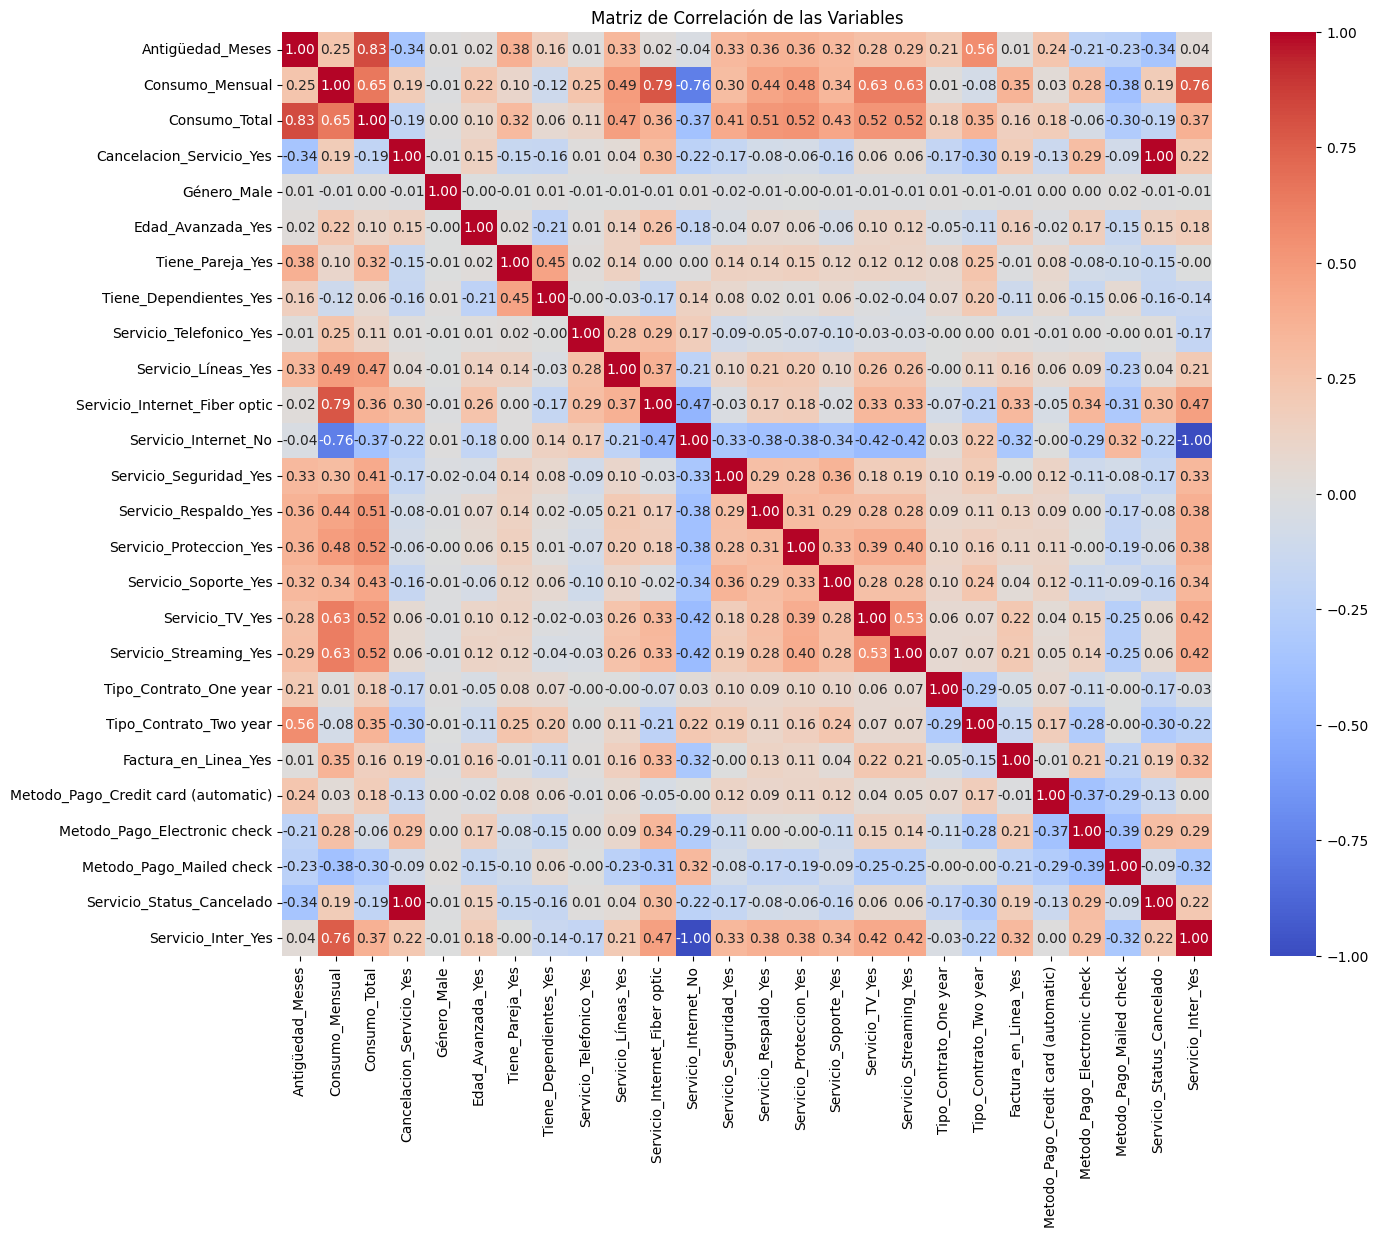


Correlación con 'Cancelacion_Servicio_Yes':
Cancelacion_Servicio_Yes               1.000000
Servicio_Status_Cancelado              1.000000
Servicio_Internet_Fiber optic          0.300949
Metodo_Pago_Electronic check           0.294626
Servicio_Inter_Yes                     0.224051
Consumo_Mensual                        0.189866
Factura_en_Linea_Yes                   0.186666
Edad_Avanzada_Yes                      0.146733
Servicio_TV_Yes                        0.062430
Servicio_Streaming_Yes                 0.060586
Servicio_Líneas_Yes                    0.039343
Servicio_Telefonico_Yes                0.012571
Género_Male                           -0.009555
Servicio_Proteccion_Yes               -0.063452
Servicio_Respaldo_Yes                 -0.080163
Metodo_Pago_Mailed check              -0.090061
Metodo_Pago_Credit card (automatic)   -0.131085
Tiene_Pareja_Yes                      -0.148546
Servicio_Soporte_Yes                  -0.160440
Tiene_Dependientes_Yes                -0.16

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = datos.corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de las Variables')
plt.show()

# Mostrar las correlaciones con la variable objetivo 'Cancelacion_Servicio_Yes'
print("\nCorrelación con 'Cancelacion_Servicio_Yes':")
print(correlation_matrix['Cancelacion_Servicio_Yes'].sort_values(ascending=False))

## Investigar cuales variables específicas se relacionan con la cancelación


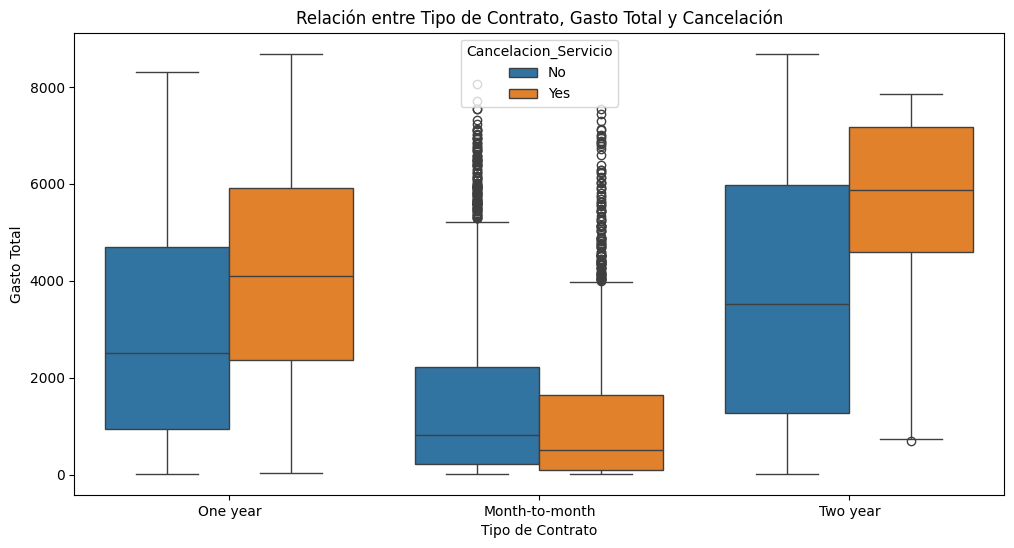

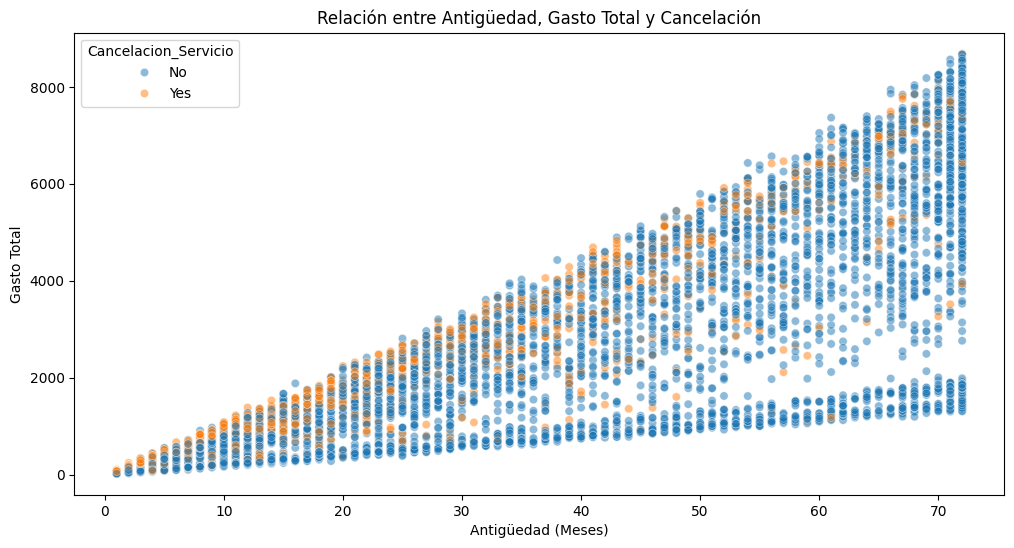

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos originales para esta visualización específica
url = "https://raw.githubusercontent.com/JosefRivers-Dev/Data-Science_Telecom_2_Oracle-LATAM/refs/heads/main/datos_tratados.csv"
datos_originales = pd.read_csv(url)

# Visualizar la relación entre 'Tipo_Contrato' y 'Consumo_Total' con 'Cancelacion_Servicio'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo_Contrato', y='Consumo_Total', hue='Cancelacion_Servicio', data=datos_originales)
plt.title('Relación entre Tipo de Contrato, Gasto Total y Cancelación')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Gasto Total')
plt.show()

# Visualizar la relación entre 'Antigüedad_Meses' y 'Consumo_Total' con 'Cancelacion_Servicio'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Antigüedad_Meses', y='Consumo_Total', hue='Cancelacion_Servicio', data=datos_originales, alpha=0.5)
plt.title('Relación entre Antigüedad, Gasto Total y Cancelación')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Gasto Total')
plt.show()

## Separacion de Datos

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo

In [50]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = datos.drop('Cancelacion_Servicio_Yes', axis=1)
y = datos['Cancelacion_Servicio_Yes']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento (X_train, y_train): (5813, 25) (5813,)
Dimensiones del conjunto de prueba (X_test, y_test): (1454, 25) (1454,)
